<a href="https://colab.research.google.com/github/Farahnosh-Yousofi/PyTorch-Tutorials/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned and worked by following codes and explanations in https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

In [171]:
import torch
from torch import nn
import matplotlib.pyplot as plt



In [172]:
# Data preparing and loading
# We'll use a linear regression formula to make straight line with known parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(0,1, step).unsqueeze(dim = 1)
Y = bias + weight*X

In [173]:
Y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [174]:
X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [175]:
# Train and test split of our data
train_split = int(0.8*len(X))
train_split_data, train_split_labels = X[:train_split], Y[:train_split] ## Means all data till train split
train_split_data

test_split_data, test_split_labels = X[train_split:], Y[train_split:]

In [176]:
len(train_split_data),len(train_split_labels)

(40, 40)

In [177]:

#How to visualize out data

def plot_predict(train_data =train_split_data,
                 train_label = train_split_labels,
                 test_data = test_split_data,
                 test_labels = test_split_labels,
                 predictions = None):
  '''
  Plots training data and test data and compares pridections
  '''
  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_label, c = "b", s =4, label = "Training data")

  #plot test data in red
  plt.scatter(test_data, test_labels, c = "g", s =4, label = "Test data")

  # Are there predictions
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", label="Predictions for test data")

  # show the legend
  plt.legend(prop={"size":14})




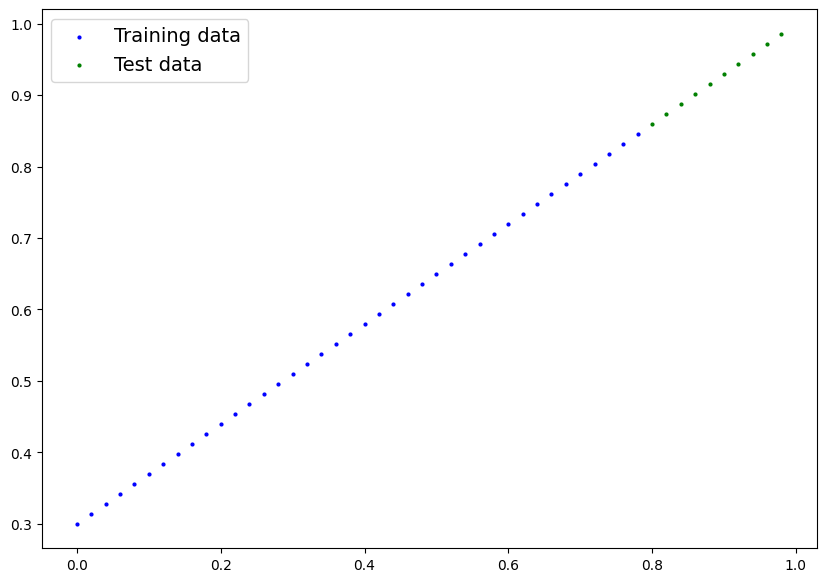

In [150]:
plot_predict(train_split_data,train_split_labels,test_split_data, test_split_labels)

In [178]:
# Build Pytorch Model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias # Linear Regression formula



**Check the content of out module**

In [179]:
## PyTorch model building essentials
## Checking the contents of out pytorch model
# create a random seed

torch.manual_seed(42)

#Create an instance of the model(this is the subclass of nn.Module)
module_instance = LinearRegressionModel()

# Checking the model parameters
list(module_instance.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [180]:
## Checking the parameters as list named parameters
module_instance.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [181]:
weight, bias

(0.7, 0.3)

In [182]:
## Testing our model with torch.inference_mode()
# make predictions
with torch.inference_mode():
  predict = module_instance(test_split_data)

predict

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [183]:
test_split_labels

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

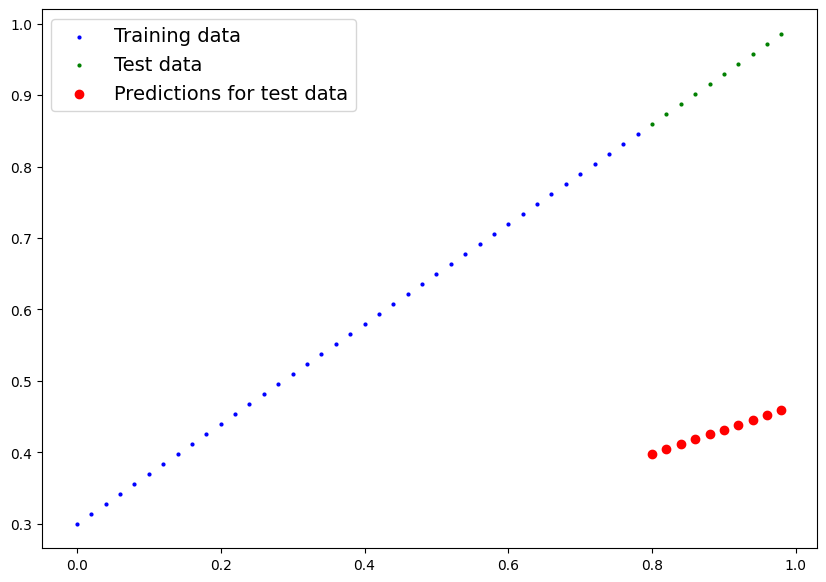

In [184]:
plot_predict(predictions=predict)

In [185]:
predict = module_instance(test_split_data)
predict

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Use inference mode to just get the predictions and ignore the gradient watching

In [186]:
## Setting up a loss function to fit the model to the data

# MAE_Loss = torch.mean(torch.abs(predict - test_split_labels))
loss_fn = nn.L1Loss()


## Set up an optimizer to minimize loss
optimizer = torch.optim.SGD(params = module_instance.parameters(), lr = 0.01)  # lr = learning rate

# Building a training loop and a testing loop in pytorch
A couple of things we need in a training loop
1. Loop through the data
2. Forward pass(This involves data moving throug our model's 'forward()' function ) to make predictions on data- also called forward propagation
3. calculate the loss(compare forward pass predictions to groung truth labels)
4. optimizer zero grad
5. Loss Backward - move backwards through the network to calculate the gradients of each parameters of our model with respect to the loss(**Backpropagations**)
6. Optimizer step: use the optimizer to adjust our models parameters to try and improve the loss (**Gradient Descent**)

In [160]:
epochs = 1  # one loop through data

# 1. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  module_instance.train() # Train mode in PyTorch set all parameter that reuire gradient to require gadient

  # 2. Forward pass
  Y_pred = module_instance(train_split_data)

  # 3. Calculate the loss
  loss = loss_fn(Y_pred, train_split_labels)
  print(f'loss: {loss}')

  # 4. optimizer zero grad

  optimizer.zero_grad()

  # 5. Perform back propagation with respect to the parameters of the model
  loss.backward()

  # 6. Step the optimizer (Perform Gradient Descent)
  optimizer.step()

  # Testing
  module_instance.eval()

  print(module_instance.state_dict())

loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


In [161]:
module_instance.state_dict()


OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [162]:
weight, bias

(0.7, 0.3)

In [163]:
with torch.inference_mode():
  Y_test_predict = module_instance(test_split_data)
  Y_test_predict

In [164]:
Y_test_predict

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])

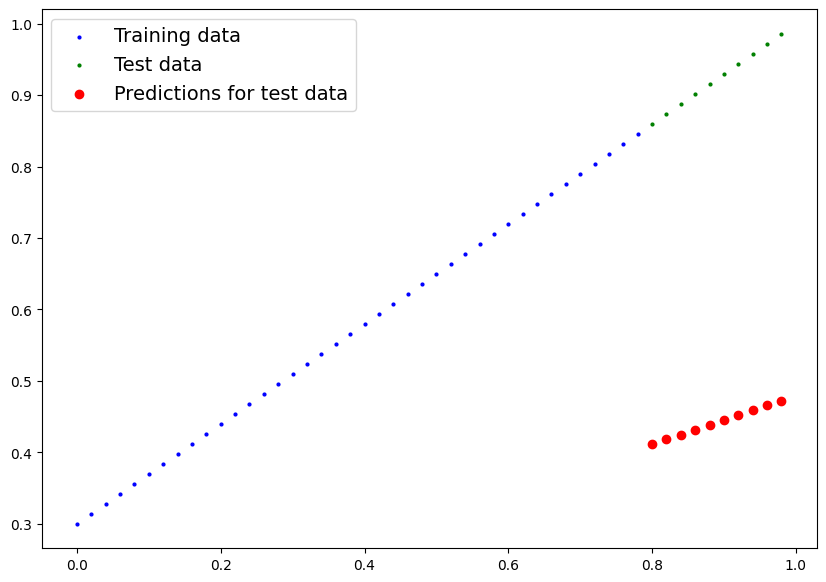

In [165]:
plot_predict(predictions=Y_test_predict)

In [166]:
with torch.inference_mode():
  Y = module_instance(test_split_data)
  print(Y)

tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])


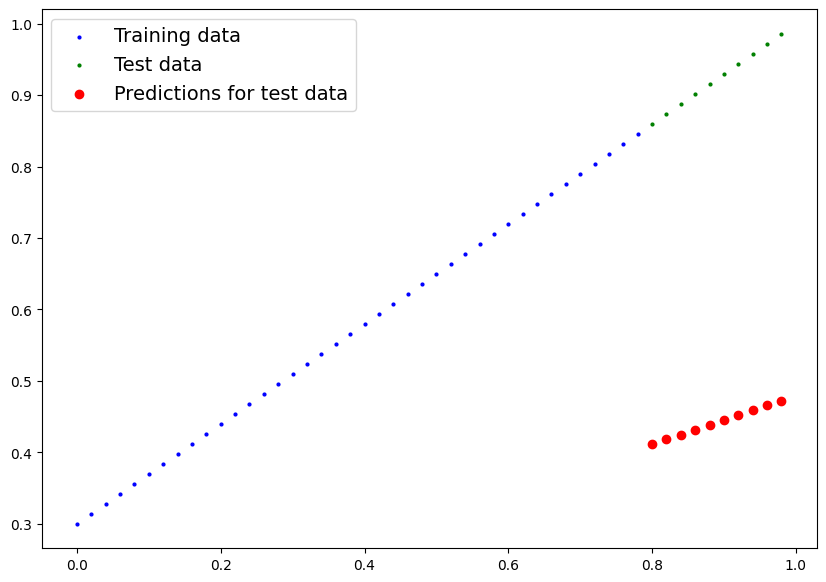

In [167]:
plot_predict(predictions=Y)

# Writing the Testing code


In [187]:
epochs = 200  # one loop through data


epoch_count =[]
loss_values = []
test_loss_values = []
# 1. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode
  module_instance.train() # Train mode in PyTorch set all parameter that reuire gradient to require gadient

  # 2. Forward pass
  Y_pred = module_instance(train_split_data)

  # 3. Calculate the loss
  loss = loss_fn(Y_pred, train_split_labels)
  print(f'loss: {loss}')

  # 4. optimizer zero grad

  optimizer.zero_grad()

  # 5. Perform back propagation with respect to the parameters of the model
  loss.backward()

  # 6. Step the optimizer (Perform Gradient Descent)
  optimizer.step()

  # Testing
  module_instance.eval() # Turn off different settings in the model which is not needed for evaluation/testing (dropout/batchnorm)

  with torch.inference_mode():
    #1. do the forward pass
    test_pred = module_instance(test_split_data)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, test_split_labels)


  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}" )
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(module_instance.state_dict())

loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
loss: 0.28983935713768005
loss: 0.2783183455467224
loss: 0.26679736375808716
loss: 0.2552763521671295
loss: 0.24375534057617188
loss: 0.23223432898521423
loss: 0.22071333229541779
loss: 0.20919232070446014
loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss: 0.18615034222602844
loss: 0.1746293306350708
loss: 0.16310831904411316
loss: 0.1515873372554779
loss: 0.14006635546684265
loss: 0.1285453587770462
loss: 0.11702437698841095
loss: 0.1060912236571312
loss: 0.09681284427642822
loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
loss: 0.08227583020925522
loss: 0

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])


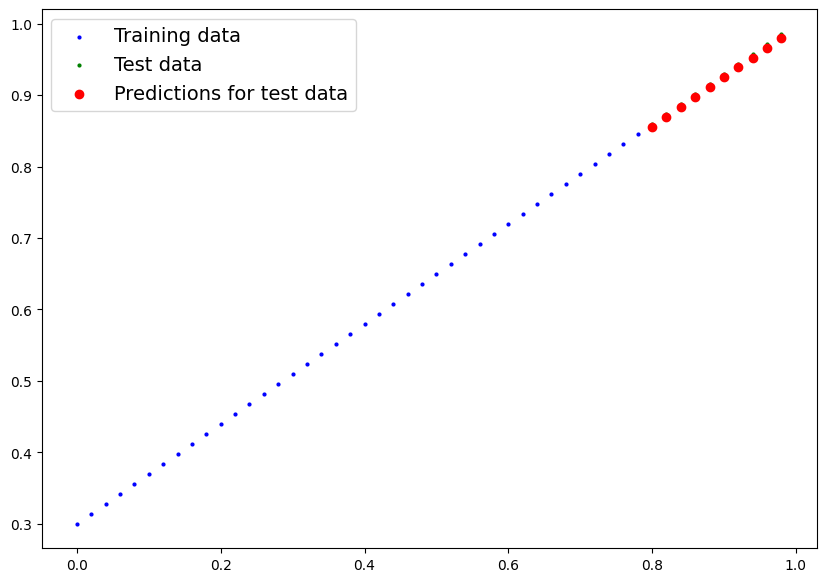

In [169]:
with torch.inference_mode():
  Y = module_instance(test_split_data)
  print(Y)

plot_predict(predictions=Y)

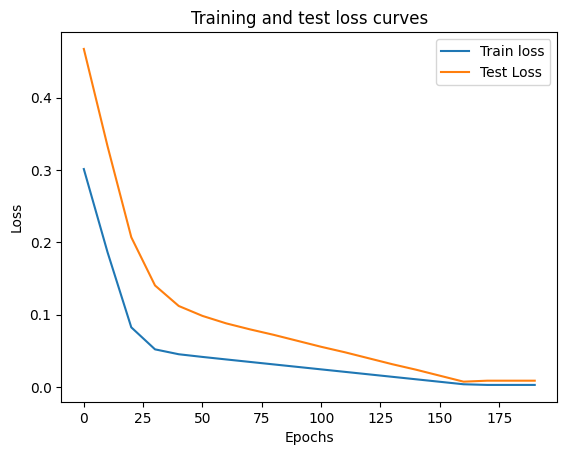

In [170]:
# Plot the loss curves
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values,  label ="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();